In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
heart_df = pd.read_csv("data/heart_disease_dataset.csv")

In [178]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,0
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [179]:
heart_df.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
smoking            int64
diabetes           int64
bmi              float64
heart_disease      int64
dtype: object

In [180]:
heart_df['heart_disease'].value_counts()

heart_disease
0    1830
1    1239
Name: count, dtype: int64

In [181]:
heart_df['sex'].value_counts()

sex
1    1705
0    1364
Name: count, dtype: int64

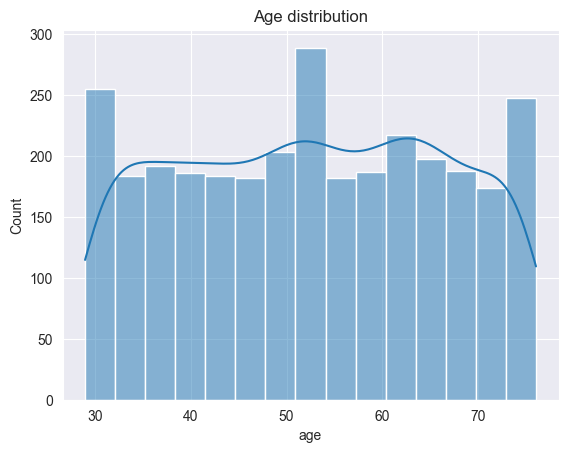

In [182]:
sns.histplot(heart_df['age'], kde=True)
plt.title("Age distribution")
plt.show()

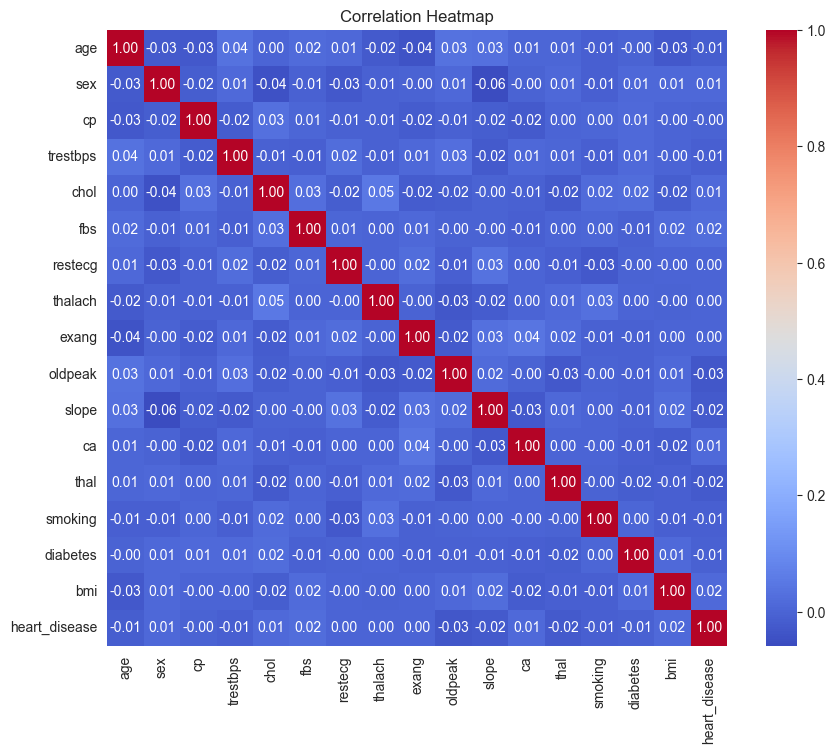

In [183]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [184]:
print("Minimum age: ", min(heart_df['age']))
print("Maximum age: ", max(heart_df['age']))

Minimum age:  29
Maximum age:  76


In [185]:
heart_df['age_group'] = pd.cut(heart_df['age'], bins=[28, 40, 50, 60, 70, 80], labels=[0, 1, 2, 3, 4])
heart_df['chol_age_ratio'] = heart_df['chol'] / heart_df['age']
heart_df['bp_high'] = (heart_df['trestbps'] > 140).astype(int)
heart_df['hr_reserve'] = heart_df['thalach'] - heart_df['age']
heart_df['risk_factors'] = heart_df['smoking'] + heart_df['diabetes'] + heart_df['fbs'] + heart_df['exang']
heart_df['st_risk'] = heart_df['slope'] * heart_df['oldpeak']
heart_df['bmi_category'] = pd.cut(heart_df['bmi'], bins=[0, 18.5, 25, 30, 35, 50], labels=[0, 1, 2, 3, 4])
heart_df['age_x_chol'] = heart_df['age'] * heart_df['chol']
heart_df['bmi_x_chol'] = heart_df['bmi'] * heart_df['chol']
heart_df['thalach_x_age'] = heart_df['thalach'] * heart_df['age']
heart_df['chol_high'] = (heart_df['chol'] > 240).astype(int)
heart_df['chol_low'] = (heart_df['chol'] < 160).astype(int)
heart_df['max_hr_predicted'] = 220 - heart_df['age']
heart_df['hr_percent'] = heart_df['thalach'] / heart_df['max_hr_predicted']
heart_df['weighted_risk'] = 2 * heart_df['diabetes'] + 2 * heart_df['smoking'] + heart_df['fbs'] + heart_df['exang']

In [186]:
heart_df = pd.get_dummies(heart_df, columns=['cp', 'thal', 'slope', 'restecg'], drop_first=True)

In [187]:
heart_df.to_csv("data/improved_dataset.csv", index=False)